In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

In [2]:
#films
url_films = "http://swapi.dev/api/films/" 
films_response = requests.get(url_films).json()

#people
url_people = "http://swapi.dev/api/people/" 
people_response = requests.get(url_people).json()

#planets
url_planets = "http://swapi.dev/api/planets/"
planets_response = requests.get(url_planets).json()

#species
url_species = "http://swapi.dev/api/species/" 
species_response = requests.get(url_species).json()

#vehicles
url_vehicles = "http://swapi.dev/api/vehicles/" 
vehicles_response = requests.get(url_vehicles).json()

#starships
url_starships = "http://swapi.dev/api/starships/"
starships_response = requests.get(url_starships).json()

In [5]:
vehicles_list = []
page = ["1", "2", "3", "4"]
url_vehicles_next = f"http://swapi.dev/api/vehicles/?page="

for x in page:
    vehicles_response_next = requests.get(url_vehicles_next + x).json()
    
#for loop to list names
    for vehicles in vehicles_response_next["results"]:
        vehicle_name = vehicles["name"]
        vehicles_list.append(vehicle_name)
        print(vehicle_name)

Sand Crawler
T-16 skyhopper
X-34 landspeeder
TIE/LN starfighter
Snowspeeder
TIE bomber
AT-AT
AT-ST
Storm IV Twin-Pod cloud car
Sail barge
Bantha-II cargo skiff
TIE/IN interceptor
Imperial Speeder Bike
Vulture Droid
Multi-Troop Transport
Armored Assault Tank
Single Trooper Aerial Platform
C-9979 landing craft
Tribubble bongo
Sith speeder
Zephyr-G swoop bike
Koro-2 Exodrive airspeeder
XJ-6 airspeeder
LAAT/i
LAAT/c
AT-TE
SPHA
Flitknot speeder
Neimoidian shuttle
Geonosian starfighter
Tsmeu-6 personal wheel bike
Emergency Firespeeder
Droid tri-fighter
Oevvaor jet catamaran
Raddaugh Gnasp fluttercraft
Clone turbo tank
Corporate Alliance tank droid
Droid gunship
AT-RT


In [ ]:
vehicles_list

In [6]:
# count vehicles in list
vehicles_count = vehicles_response["count"]
print(f"There are {vehicles_count} vehicles in this API.")

There are 39 vehicles in this API.


In [7]:
## Set url for API
url_vehicles = 'https://swapi.dev/api/vehicles/?search='

search_vehicles = vehicles_list

# Set empty lists to hold vehicle's stats
length = []
max_atmosphering_speed = []
cargo_capacity = []
cost_in_credits = []
starwars_vehicles = []

# Loop through each character and make API request
for vehicles in search_vehicles:
    
    # Create search query, make request and store in json
    query = url_vehicles + vehicles
    response = requests.get(query)
    response_json = response.json()
    
    
    # stats of vehicles 
    try:
        length.append(response_json['results'][0]['length'])
        max_atmosphering_speed.append(response_json['results'][0]['max_atmosphering_speed'])
        cargo_capacity.append(response_json['results'][0]['cargo_capacity'])
        cost_in_credits.append(response_json['results'][0]['cost_in_credits'])
        starwars_vehicles.append(vehicles)
        print(f"{vehicles} found! Appending stats")
        
   
    # exceptions for vehicles not available in the Star Wars API
    except: 
        print(f"{vehicles} not found")
        pass

Sand Crawler found! Appending stats
T-16 skyhopper found! Appending stats
X-34 landspeeder found! Appending stats
TIE/LN starfighter found! Appending stats
Snowspeeder found! Appending stats
TIE bomber found! Appending stats
AT-AT found! Appending stats
AT-ST found! Appending stats
Storm IV Twin-Pod cloud car found! Appending stats
Sail barge found! Appending stats
Bantha-II cargo skiff found! Appending stats
TIE/IN interceptor found! Appending stats
Imperial Speeder Bike found! Appending stats
Vulture Droid found! Appending stats
Multi-Troop Transport found! Appending stats
Armored Assault Tank found! Appending stats
Single Trooper Aerial Platform found! Appending stats
C-9979 landing craft found! Appending stats
Tribubble bongo found! Appending stats
Sith speeder found! Appending stats
Zephyr-G swoop bike found! Appending stats
Koro-2 Exodrive airspeeder found! Appending stats
XJ-6 airspeeder found! Appending stats
LAAT/i found! Appending stats
LAAT/c found! Appending stats
AT-TE fou

In [30]:
#create new dataframe for all vehicle size found
vehicles_size_df = pd.DataFrame({"Vehicle": search_vehicles,
                            "Length": length})
vehicles_size_df

,Vehicle,Length
0,Sand Crawler,36.8
1,T-16 skyhopper,10.4
2,X-34 landspeeder,3.4
3,TIE/LN starfighter,6.4
4,Snowspeeder,4.5
5,TIE bomber,7.8
6,AT-AT,20
7,AT-ST,2
8,Storm IV Twin-Pod cloud car,7
9,Sail barge,30


In [29]:
#drop vehicles sizes that don't have stats listed and create new dataframe (for tracking purposes)
clean_vehicles_size_df = vehicles_size_df.drop(vehicles_size_df[vehicles_size_df['Length'] == 'unknown'].index) 

clean_vehicles_size_df

,Vehicle,Length
0,Sand Crawler,36.8
1,T-16 skyhopper,10.4
2,X-34 landspeeder,3.4
3,TIE/LN starfighter,6.4
4,Snowspeeder,4.5
5,TIE bomber,7.8
6,AT-AT,20
7,AT-ST,2
8,Storm IV Twin-Pod cloud car,7
9,Sail barge,30


In [28]:
# sort dataframe vehicle length by ascending order
clean_vehicles_size_df["Length"] = clean_vehicles_size_df["Length"].astype(float)
length_df = clean_vehicles_size_df.sort_values("Length", ascending=True)
length_df

,Vehicle,Length
19,Sith speeder,1.50
16,Single Trooper Aerial Platform,2.00
27,Flitknot speeder,2.00
7,AT-ST,2.00
12,Imperial Speeder Bike,3.00
38,AT-RT,3.20
2,X-34 landspeeder,3.40
30,Tsmeu-6 personal wheel bike,3.50
13,Vulture Droid,3.50
20,Zephyr-G swoop bike,3.68


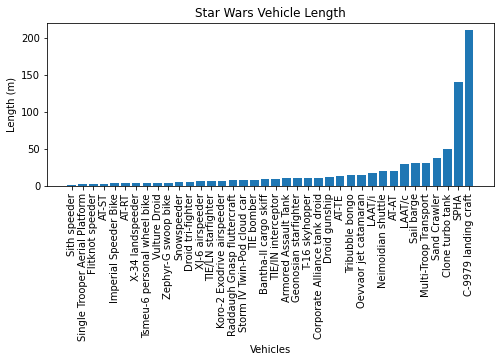

In [11]:
## bar chart for vehicle size
tick_locations = [value for value in clean_vehicles_size_df["Vehicle"]]
labels = clean_vehicles_size_df["Vehicle"]
plt.figure(figsize=(8, 3))
plt.bar(length_df["Vehicle"], length_df["Length"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.ylabel("Length (m)")
plt.xlabel("Vehicles")
plt.title("Star Wars Vehicle Length")
plt.savefig("Bar_Vehicle_Length.png")
plt.show()

In [27]:
#create new dataframe for vehicle speed 
vehicles_speed_df = pd.DataFrame({"Vehicle": search_vehicles,
                            "Max Atmosphering Speed": max_atmosphering_speed,
                            })
vehicles_speed_df

,Vehicle,Max Atmosphering Speed
0,Sand Crawler,30
1,T-16 skyhopper,1200
2,X-34 landspeeder,250
3,TIE/LN starfighter,1200
4,Snowspeeder,650
5,TIE bomber,850
6,AT-AT,60
7,AT-ST,90
8,Storm IV Twin-Pod cloud car,1500
9,Sail barge,100


In [26]:
#drop vehicle speeds that don't have stats listed & Geonosian starfighter, then create new dataframe (for tracking purposes)
clean_vehicles_speed_df = vehicles_speed_df.drop(vehicles_speed_df[vehicles_speed_df['Max Atmosphering Speed'] == 'unknown'].index) 
clean_vehicles_speed_df = clean_vehicles_speed_df.drop(clean_vehicles_speed_df[clean_vehicles_speed_df["Vehicle"] == "Geonosian starfighter"].index)

clean_vehicles_speed_df

,Vehicle,Max Atmosphering Speed
0,Sand Crawler,30
1,T-16 skyhopper,1200
2,X-34 landspeeder,250
3,TIE/LN starfighter,1200
4,Snowspeeder,650
5,TIE bomber,850
6,AT-AT,60
7,AT-ST,90
8,Storm IV Twin-Pod cloud car,1500
9,Sail barge,100


In [31]:
# sort dataframe vehicle speed by ascending order
clean_vehicles_speed_df["Max Atmosphering Speed"] = clean_vehicles_speed_df["Max Atmosphering Speed"].astype(float)
speed_df = clean_vehicles_speed_df.sort_values("Max Atmosphering Speed", ascending=True)
speed_df

,Vehicle,Max Atmosphering Speed
0,Sand Crawler,30.0
26,SPHA,35.0
14,Multi-Troop Transport,35.0
15,Armored Assault Tank,55.0
25,AT-TE,60.0
6,AT-AT,60.0
18,Tribubble bongo,85.0
7,AT-ST,90.0
38,AT-RT,90.0
9,Sail barge,100.0


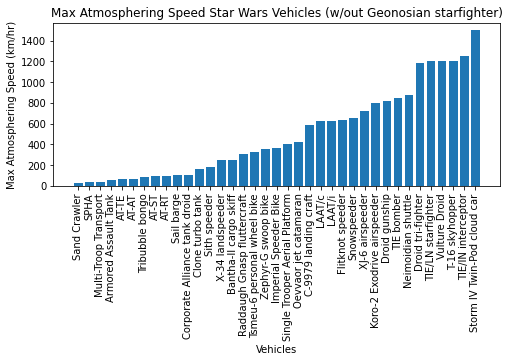

In [34]:
# plot for vehicle speed
tick_locations = [value for value in clean_vehicles_speed_df["Vehicle"]]
labels = clean_vehicles_speed_df["Vehicle"]
plt.figure(figsize=(8, 3))
plt.bar(speed_df["Vehicle"], speed_df["Max Atmosphering Speed"])
plt.xticks(tick_locations, labels, rotation="vertical")
plt.ylabel("Max Atmosphering Speed (km/hr)")
plt.xlabel("Vehicles")
plt.title("Max Atmosphering Speed Star Wars Vehicles (w/out Geonosian starfighter)")
plt.savefig("Bar_Vehicle_Speed.png")
plt.show()

In [ ]:
# analysis
smallest_vehicle = length_df.loc[0, :]
smallest_vehicle_name = smallest_length["Vehicle Name"]
smallest_vehicle_speed = smallest_speed["Max Atmosphering Speed (km/hr)"]
largest_vehicle = length_df.loc[len(Starship_Length_df)-1, :]
largest_vehicle_name = largest_length["Vehicle Name"]
largest_vehicle_speed = Largest_speed["Max Atmosphering Speed (km/hr)"]

average_length = vehicle_length_df["Length (m)"].mean()
average_max_atmosphering_speed = average_length / average_height * 100
Death_Star_vs_Yoda = Largest_Ship_Length / Smallest_Character_Length * 100